<a href="https://colab.research.google.com/github/IngerMasha/week9/blob/main/day2_Exercises_XP_Gold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

mcu_data = pd.read_csv('mcu_box_office.csv')
print("Dataset info:")
print(mcu_data.info())
print("\nFirst rows of the dataset:")
print(mcu_data.head())

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     object
 7   opening_weekend       27 non-null     object
 8   domestic_box_office   27 non-null     object
 9   worldwide_box_office  27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB
None

First rows of the dataset:
                          movie_title  mcu_phase release_date  tomato_meter  \
0                            Iron Man          1     5/2/2008            94   
1                 The Incredible Hulk     

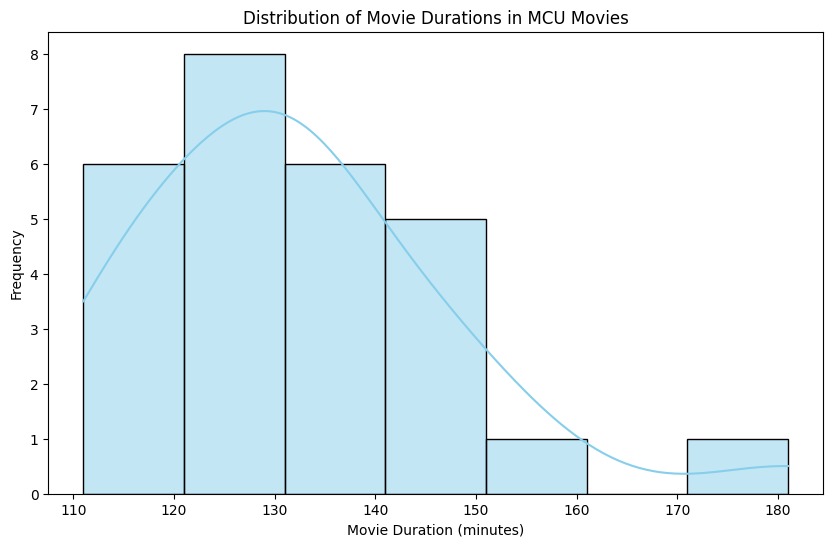

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=mcu_data, x='movie_duration', kde=True, color='skyblue')
plt.title('Distribution of Movie Durations in MCU Movies')
plt.xlabel('Movie Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

Exercise 2 : Box Plot Of Audience And Tomato Meter Scores

<ipython-input-4-079271237d43>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Score Type', y='Score Value', data=scores_df, palette='Set2')


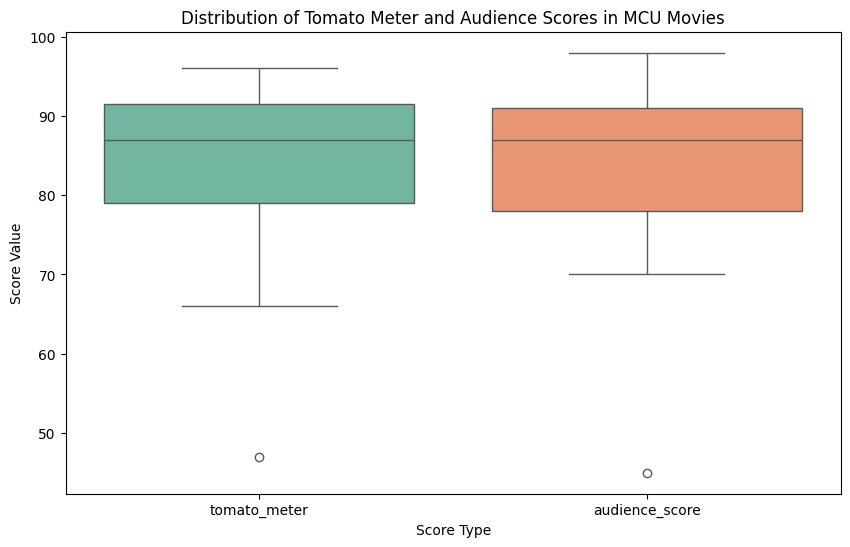

In [4]:
scores_df = pd.melt(mcu_data, id_vars=['movie_title'], value_vars=['tomato_meter', 'audience_score'],
                    var_name='Score Type', value_name='Score Value')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Score Type', y='Score Value', data=scores_df, palette='Set2')
plt.title('Distribution of Tomato Meter and Audience Scores in MCU Movies')
plt.xlabel('Score Type')
plt.ylabel('Score Value')
plt.show()

Exercise 3 : Pair Plot Of Financial Data

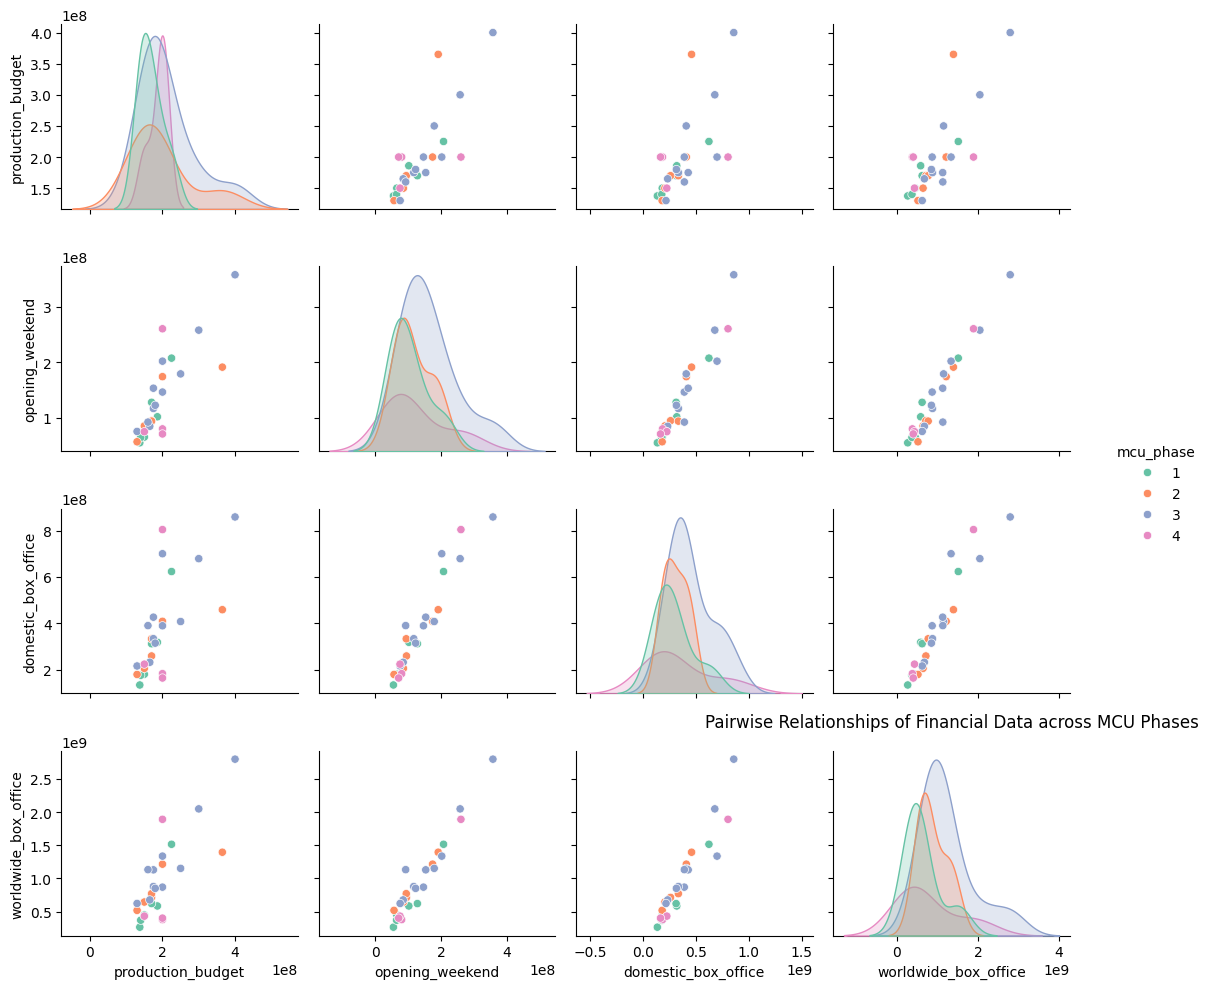

In [8]:
financial_data = mcu_data[['production_budget', 'opening_weekend', 'domestic_box_office', 'worldwide_box_office', 'mcu_phase']]

financial_data.loc[:, 'production_budget'] = financial_data['production_budget'].str.replace(',', '').astype(float)
financial_data.loc[:, 'opening_weekend'] = financial_data['opening_weekend'].str.replace(',', '').astype(float)
financial_data.loc[:, 'domestic_box_office'] = financial_data['domestic_box_office'].str.replace(',', '').astype(float)
financial_data.loc[:, 'worldwide_box_office'] = financial_data['worldwide_box_office'].str.replace(',', '').astype(float)

sns.pairplot(financial_data, hue='mcu_phase', palette='Set2')
plt.title('Pairwise Relationships of Financial Data across MCU Phases')
plt.tight_layout()

plt.show()

Exercise 4: Heatmap Of Correlation Between Financial Metrics

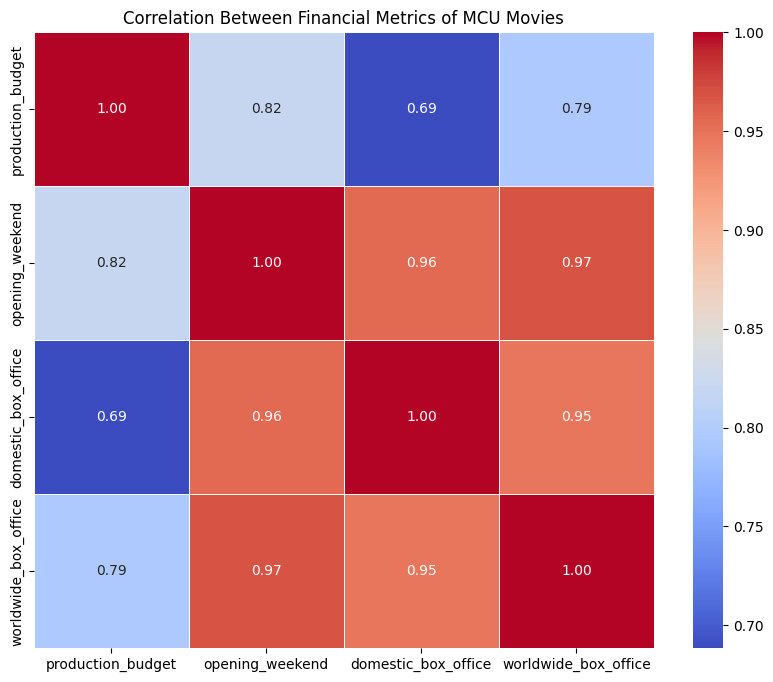

In [9]:
financial_metrics = ['production_budget', 'opening_weekend', 'domestic_box_office', 'worldwide_box_office']

subset = financial_data[financial_metrics]

corr_matrix = subset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Between Financial Metrics of MCU Movies')
plt.show()

Exercise 5: Line Plot Of Box Office Trends Over Time

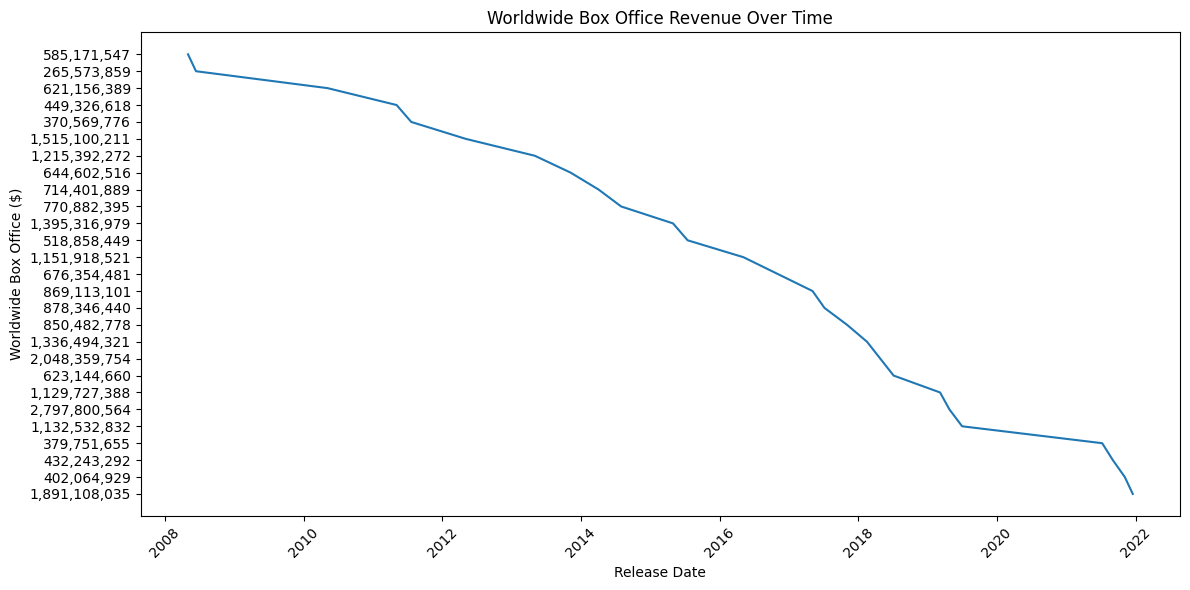

In [15]:

mcu_data['release_date'] = pd.to_datetime(mcu_data['release_date'])

mcu_data = mcu_data.sort_values(by='release_date')

plt.figure(figsize=(12, 6))
sns.lineplot(data=mcu_data, x='release_date', y='worldwide_box_office')
plt.title('Worldwide Box Office Revenue Over Time')
plt.xlabel('Release Date')
plt.ylabel('Worldwide Box Office ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Exercise 6: Violin Plot Of Movie Durations By MCU Phase

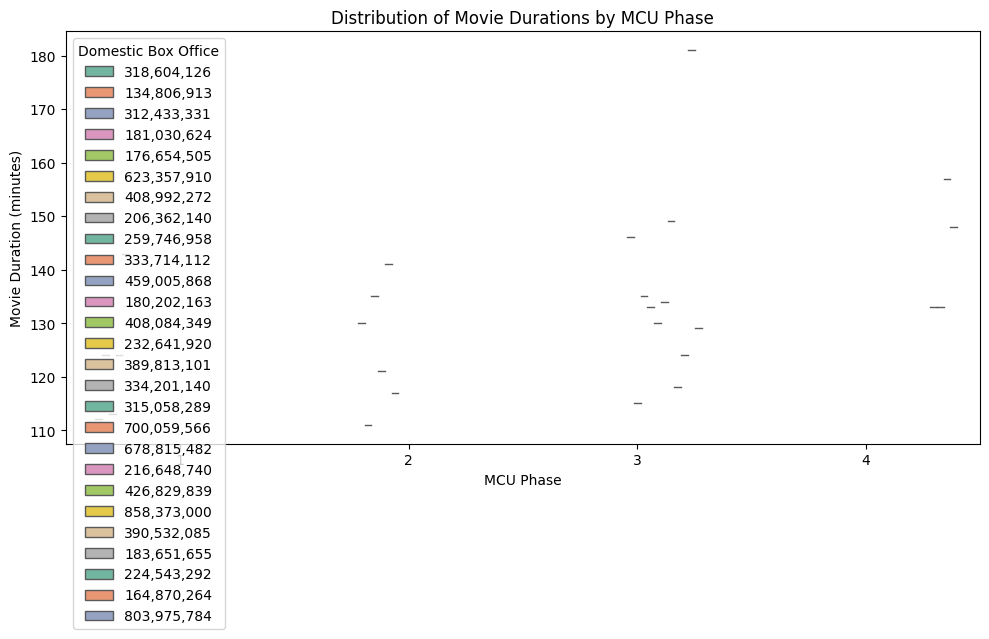

In [23]:
plt.figure(figsize=(10, 6))

palette = "Set2"
sns.violinplot(data=mcu_data, x='mcu_phase', y='movie_duration', hue='domestic_box_office', split=True, palette=palette, linewidth=1)
plt.title('Distribution of Movie Durations by MCU Phase')
plt.xlabel('MCU Phase')
plt.ylabel('Movie Duration (minutes)')
plt.legend(title='Domestic Box Office', loc='upper left')  # Adjust legend position
plt.tight_layout()
plt.show()